In [1]:
from aquacrop import AquaCropModel, IrrigationManagement
import matplotlib.pyplot as plt
import pandas as pd
import yaml

from evaluator import AquaCropEvaluator
from prescriptor import AquaCropPrescriptor

In [2]:
results_df = pd.read_csv("results/scaled/results.csv")
baseline_df = pd.read_csv("baselines/one-season.csv")

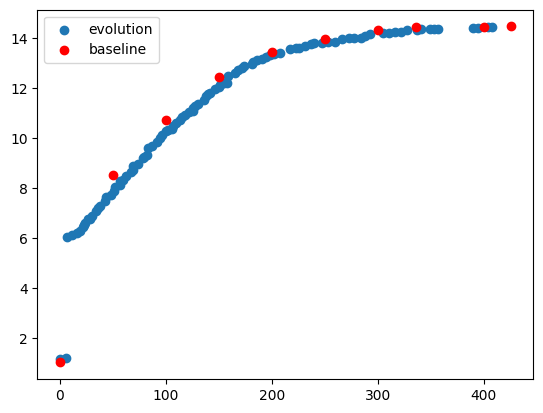

In [3]:
gen_df = results_df[results_df["gen"] == results_df["gen"].max()]
plt.scatter(gen_df["irrigation"], -1 * gen_df["yield"], label="evolution")
plt.scatter(baseline_df["irrigation"], baseline_df["yield"], color='red', label="baseline")
plt.legend()
plt.show()

## Examining the Results of Runs

In [4]:
with open("config.yml", "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

evaluator = AquaCropEvaluator(**config["eval_params"])
dummy_prescriptor = AquaCropPrescriptor(**config["prescriptor_params"])

model = AquaCropModel(sim_start_time=evaluator.sim_start_date,
                      sim_end_time=evaluator.sim_end_date,
                      weather_df=evaluator.weather_data,
                      soil=evaluator.soil,
                      crop=evaluator.crop,
                      initial_water_content=evaluator.init_wc,
                      irrigation_management=IrrigationManagement(irrigation_method=5))

results_df = evaluator.run_aquacrop(model, dummy_prescriptor)
final_stats = model._outputs.final_stats

In [5]:
wdf = evaluator.weather_data
print(wdf.columns)
filtered = wdf[(wdf["Date"] >= pd.to_datetime(evaluator.sim_start_date)) & (wdf["Date"] <= pd.to_datetime(evaluator.sim_end_date))]
print(len(filtered))
print(len(results_df))

Index(['MinTemp', 'MaxTemp', 'Precipitation', 'ReferenceET', 'Date'], dtype='object')
184
184


In [6]:
assert results_df["depths"].equals(results_df["IrrDay"])
assert results_df["DryYield"].max() == final_stats["Dry yield (tonne/ha)"].max()

KeyError: 'depths'

In [ ]:
print(results_df.columns)

Index(['time_step_counter', 'season_counter', 'dap', 'Wr', 'z_gw',
       'surface_storage', 'IrrDay', 'Infl', 'Runoff', 'DeepPerc', 'CR', 'GwIn',
       'Es', 'EsPot', 'Tr', 'TrPot', 'growing_season', 'th1', 'th2', 'th3',
       'th4', 'th5', 'th6', 'th7', 'th8', 'th9', 'th10', 'th11', 'th12', 'gdd',
       'gdd_cum', 'z_root', 'canopy_cover', 'canopy_cover_ns', 'biomass',
       'biomass_ns', 'harvest_index', 'harvest_index_adj', 'DryYield',
       'FreshYield', 'YieldPot', 'depths'],
      dtype='object')


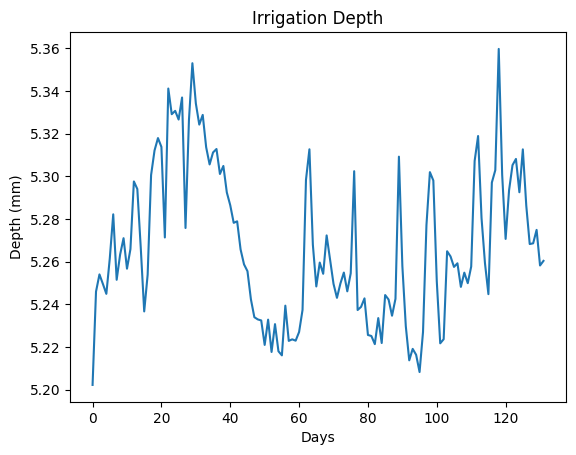

In [ ]:
plt.plot(results_df[results_df["depths"] > 0]["depths"])
plt.title("Irrigation Depth")
plt.xlabel("Days")
plt.ylabel("Depth (mm)")
plt.show()

## Examine Generated Data

In [ ]:
data_df = pd.read_csv("data/one-season-data.csv")
# Filter out rows where every single column except "baseline" is zero
data_df = data_df[(data_df.drop(columns=["baseline"]) != 0).any(axis=1)]

,time_step_counter,season_counter,dap,Wr,z_gw,surface_storage,IrrDay,Infl,Runoff,DeepPerc,...,canopy_cover_ns,biomass,biomass_ns,harvest_index,harvest_index_adj,DryYield,FreshYield,YieldPot,depth,baseline
count,1320.000000,1320.0,1320.000000,1320.000000,0.0,1320.0,1320.000000,1320.000000,1320.000000,1320.0,...,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.0,1320.00000
mean,65.500000,0.0,66.500000,501.664053,NaN,0.0,3.094382,4.763679,0.151309,0.0,...,0.659010,1250.953420,1293.398215,0.112674,0.113235,2.917637,3.241819,2.977852,0.0,4.50000
std,38.118466,0.0,38.118466,201.656147,NaN,0.0,7.981397,8.564819,0.819931,0.0,...,0.374831,1053.667195,1075.570280,0.159682,0.160479,4.476193,4.973547,4.557583,0.0,2.87337
min,0.000000,0.0,1.000000,92.300000,NaN,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
25%,32.750000,0.0,33.750000,361.117500,NaN,0.0,0.000000,0.000000,0.000000,0.0,...,0.279066,105.757828,125.067351,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.00000
50%,65.500000,0.0,66.500000,516.345000,NaN,0.0,0.000000,0.000000,0.000000,0.0,...,0.895882,1158.417781,1212.070003,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.50000
75%,98.250000,0.0,99.250000,663.532500,NaN,0.0,0.000000,4.570000,0.000000,0.0,...,0.957346,2242.442179,2303.965577,0.214510,0.216138,4.895428,5.439364,4.942393,0.0,7.00000
max,131.000000,0.0,132.000000,858.280000,NaN,0.0,25.000000,34.749199,9.939454,0.0,...,0.958826,2984.223853,2993.138404,0.480000,0.484851,14.451491,16.057213,14.367064,0.0,9.00000
